In [2]:
import pandas as pd
import pydot
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
subjectMetadata = pd.read_csv('./data/metadata/subject_metadata.csv')
questionMetadata = pd.read_csv('./data/metadata/question_metadata_task_1_2.csv')

In [3]:
del subjectMetadata["Name"]

In [4]:
subjectMetadata["ParentId"] = subjectMetadata["ParentId"].fillna(0)

In [5]:
subjectMetadata["ParentId"] = subjectMetadata["ParentId"].astype(int)

In [6]:
subjectAdjacencyList = {}

def condition(cell) :
    subjectAdjacencyList[cell] = []

subjectMetadata["SubjectId"].apply(lambda cell: condition(cell))

0      None
1      None
2      None
3      None
4      None
       ... 
383    None
384    None
385    None
386    None
387    None
Name: SubjectId, Length: 388, dtype: object

In [7]:
def condition(cell) :
    if cell["ParentId"] != 0 :
        subjectAdjacencyList[cell["ParentId"]].append(cell["SubjectId"])

subjectMetadata.apply(lambda cell: condition(cell), axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
383    None
384    None
385    None
386    None
387    None
Length: 388, dtype: object

In [8]:
for key in list(subjectAdjacencyList) :
    if not(len(subjectAdjacencyList[key]) > 0) :
        del subjectAdjacencyList[key]

del subjectAdjacencyList[1642]
del subjectAdjacencyList[692]
del subjectAdjacencyList[698]

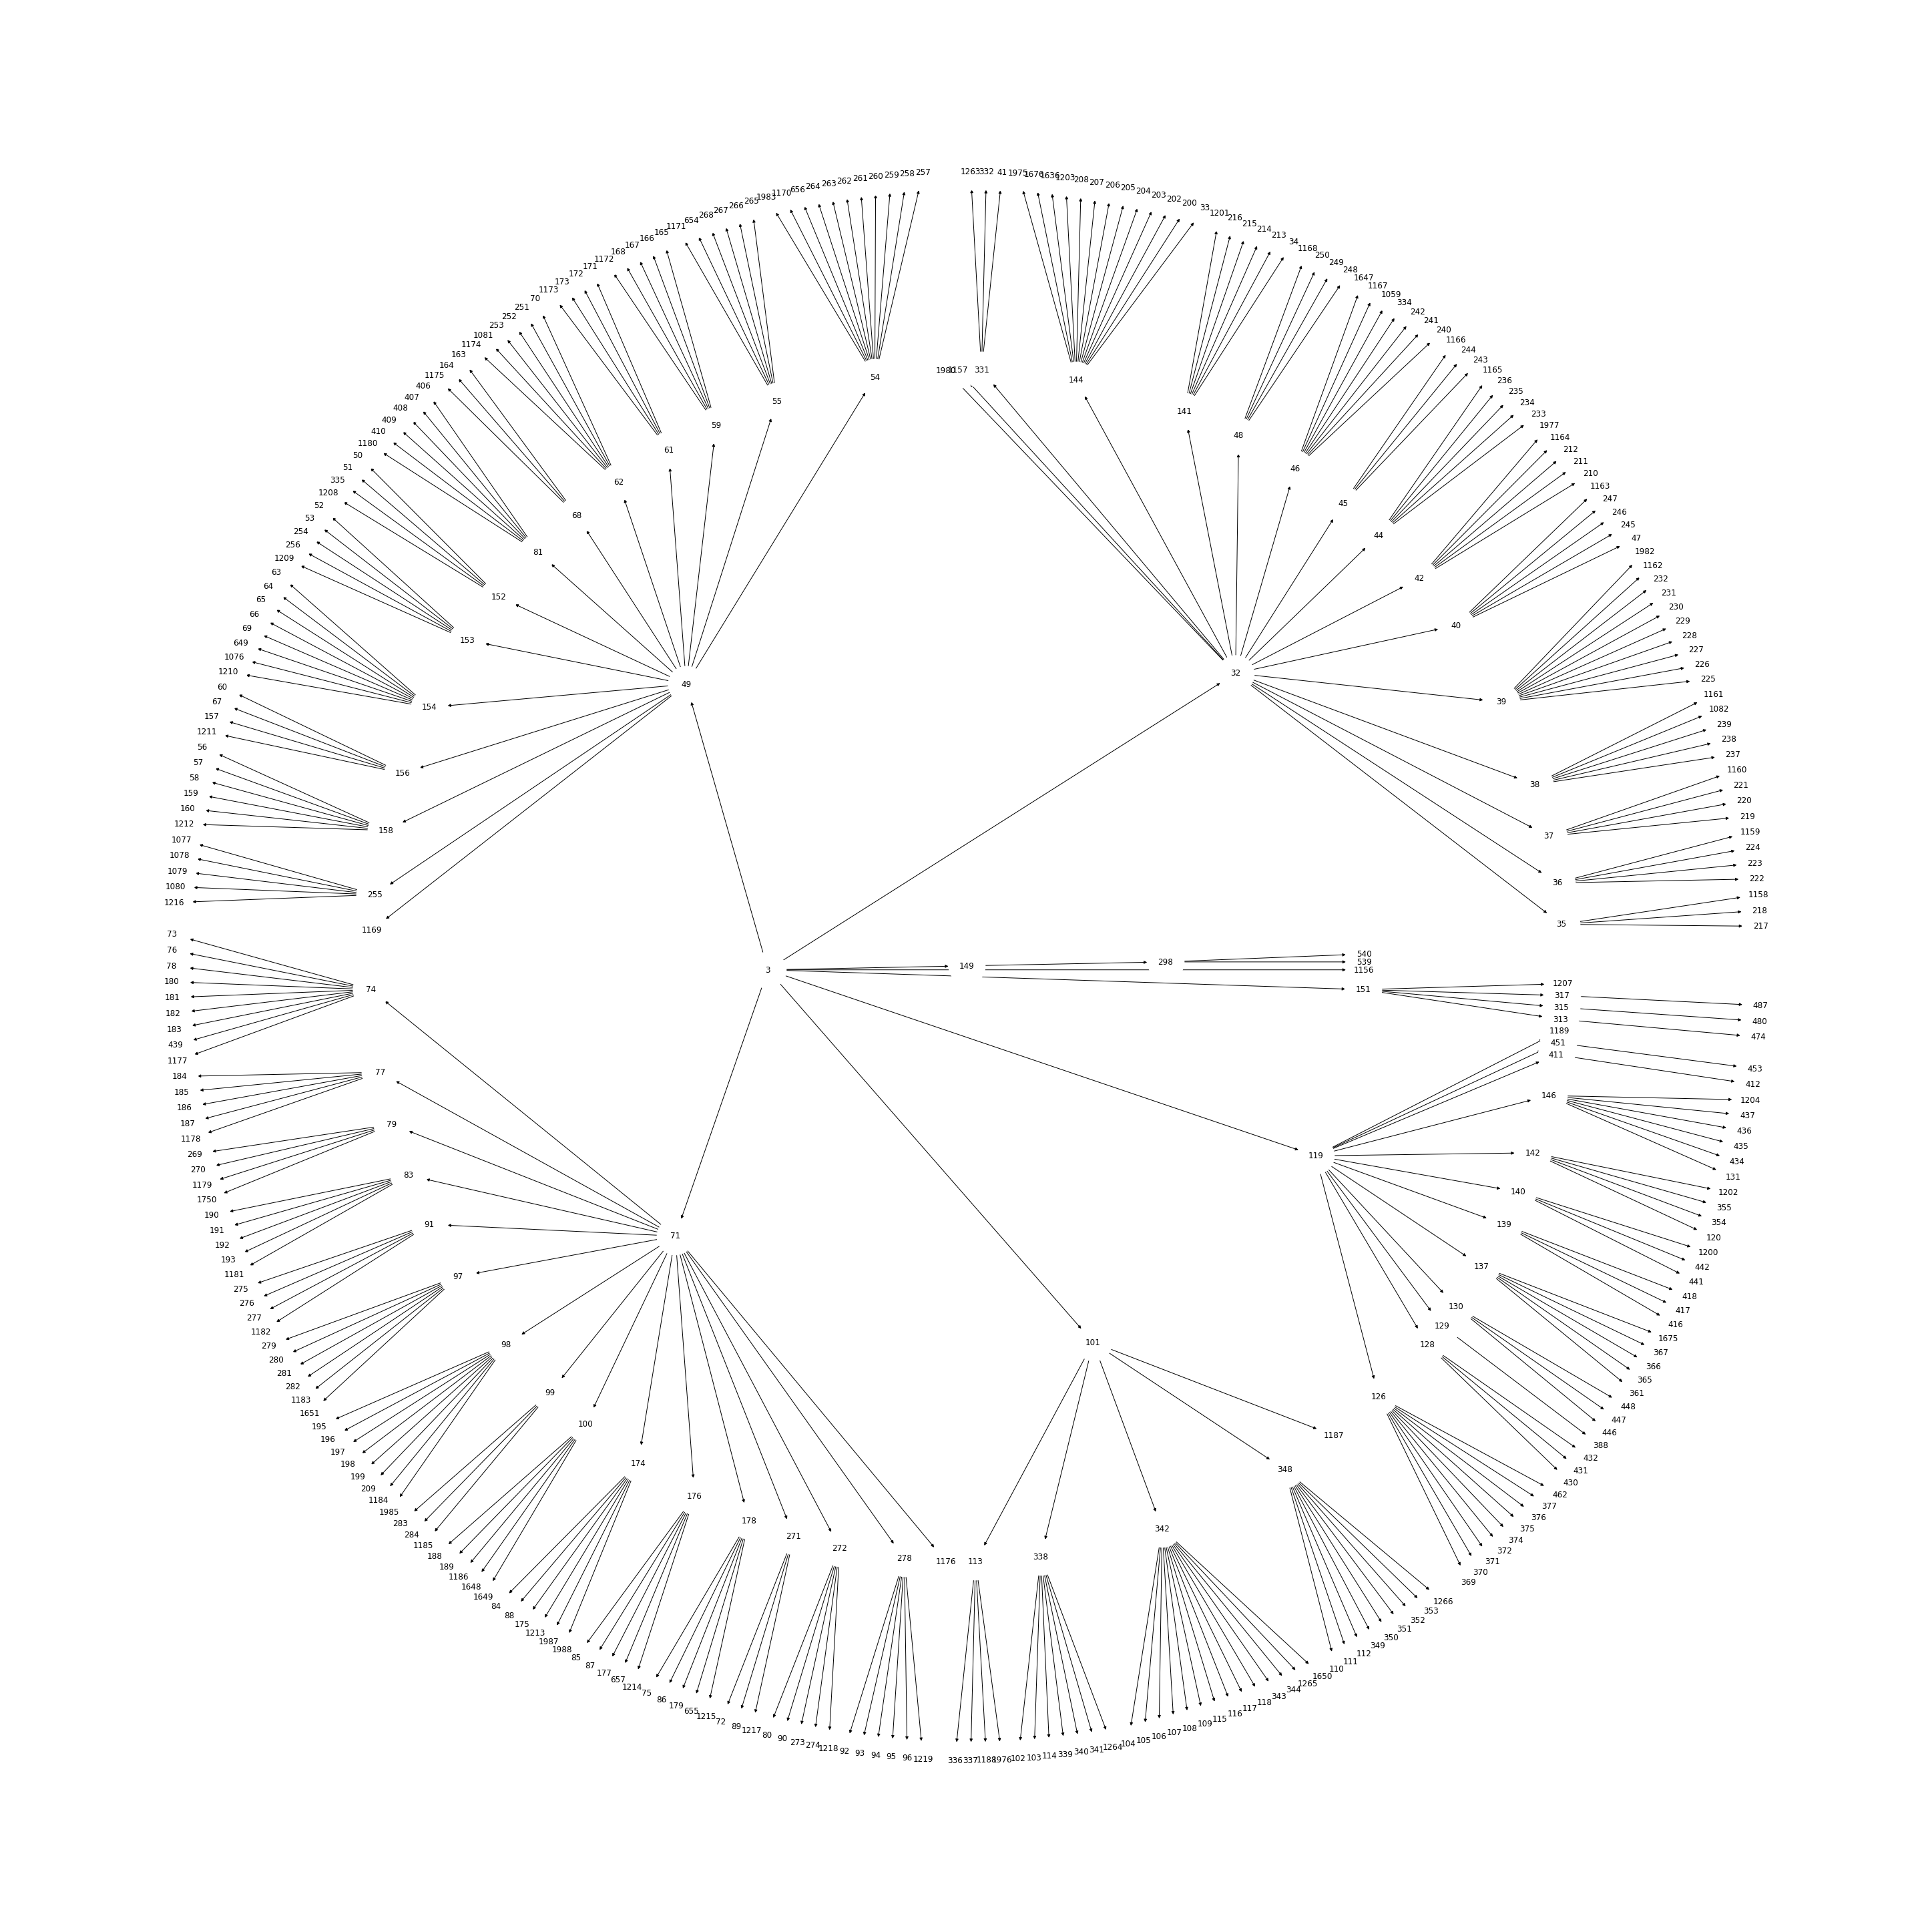

In [105]:
g = nx.DiGraph()
g.add_nodes_from(subjectAdjacencyList.keys())

for key in subjectAdjacencyList :
    for i in subjectAdjacencyList[key] :
        g.add_edge(key, i)

plt.figure(3,figsize=(40, 40))

options = {
    'node_color': 'white',
    'node_size': 3000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 9,
}

pos=graphviz_layout(g, prog='twopi')
nx.draw(g, pos, with_labels=True, arrows=True, **options)
plt.savefig("Subject Tree.png", format="PNG")

In [9]:
for i in range(1, 9):
    math = "{}{}".format("Math", i)
    mathLevel = "{}{}".format(math, "Level")
    mathStdIQ = "{}{}".format(math, "StdIQ")
    mathDiff = "{}{}".format(math, "Difficulty")
    (questionMetadata[math], questionMetadata[mathLevel], 
     questionMetadata[mathStdIQ], questionMetadata[mathDiff]) = (0, 0, 0, 0)
questionMetadata["QuestionLevel"] = 0
questionMetadata["QuestionDifficulty"] = 0

In [10]:
level1Math = subjectAdjacencyList[3]

def condition(cell, index) :
    sid = cell[1:-1].split(', ')
    for i in sid :
        if int(i) == level1Math[index - 1] :
            return 1
    return 0

for i in range(1,9) :
    math = "{}{}".format("Math", i)
    questionMetadata[math] = questionMetadata["SubjectId"].apply(lambda cell: condition(cell, i))

In [11]:
subjectMetadata["MathType"] = 0

In [12]:
mathTypes = {}
Type = 1

for i in subjectAdjacencyList[3] :
    mathTypes[Type] = [i]
    Type += 1

Type = 1
for i in mathTypes :
    if(mathTypes[i][0] in subjectAdjacencyList) :
        mathTypes[Type].extend(subjectAdjacencyList[mathTypes[i][0]])
    Type += 1

for i in mathTypes :
    for j in subjectAdjacencyList[mathTypes[i][0]] :
        if(j in subjectAdjacencyList):
            mathTypes[i].extend(subjectAdjacencyList[j])

KeyError: 1156

In [13]:
def condition(row) :
    for i in mathTypes :
        if row["SubjectId"] in mathTypes[i] :
            return i
    return 0

subjectMetadata["MathType"] = subjectMetadata.apply(lambda row: condition(row), axis = 1)

In [14]:
def condition(cell, index) :
    lvl = 0
    sid = cell["SubjectId"][1:-1].split(', ')
    for i in sid :
        subject = subjectMetadata[subjectMetadata.SubjectId == int(i)]
        if int(subject["MathType"]) == index :
            lvl += int(subject["Level"])
    return lvl

for i in range(1,9) :
    mathLevel = "{}{}{}".format("Math", i, "Level")
    questionMetadata[mathLevel] = questionMetadata.apply(lambda cell: condition(cell, i), axis = 1)

In [15]:
def condition(row) :
    lvl = 0
    for i in range(1, 9):
        mathLevel = "{}{}{}".format("Math", i, "Level")
        if int(row[mathLevel]) != 0 :
            lvl += int(row[mathLevel])
    return lvl

questionMetadata["QuestionLevel"] = questionMetadata.apply(lambda row: condition(row), axis = 1)

In [ ]:
del questionMetadata["SubjectId"]

In [3]:
pd.set_option('display.max_columns', 1000)
# questionMetadata.head(1000)
questionMetadata

,QuestionId,Math1,Math1Level,Math1StdIQ,Math1Difficulty,Math2,Math2Level,Math2StdIQ,Math2Difficulty,Math3,Math3Level,Math3StdIQ,Math3Difficulty,Math4,Math4Level,Math4StdIQ,Math4Difficulty,Math5,Math5Level,Math5StdIQ,Math5Difficulty,Math6,Math6Level,Math6StdIQ,Math6Difficulty,Math7,Math7Level,Math7StdIQ,Math7Difficulty,Math8,Math8Level,Math8StdIQ,Math8Difficulty,QuestionLevel,QuestionDifficulty
0,13090,1,6,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0
1,1855,0,0,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0
2,10423,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
3,2290,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,12785,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27608,8083,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
27609,24671,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
27610,18085,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
27611,25102,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0


In [22]:
questionMetadata.to_csv('question_subject_metadata.csv', header=True, index=False)

In [3]:
questionMetadata = pd.read_csv('question_subject_metadata.csv')

In [5]:
df = pd.DataFrame(questionMetadata, columns = ['QuestionId', 'QuestionLevel'])
(df["MathType"], df["MathDifficulty"], df["MathStdIQ"]) = (0, 0, 0)

In [6]:
def condition(row) :
    for i in range(1, 9) :
        math = "{}{}".format("Math", i)
        if row[math] == 1 :
            return i
    return 1

df["MathType"] = questionMetadata.apply(lambda row: condition(row), axis = 1)

In [7]:
df["QuestionLevel"] = questionMetadata["QuestionLevel"]

In [9]:
df.to_csv('question_subject_metadata.csv', header=True, index=False)